In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB
None


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [5]:
df['promotion_last_5years'].unique()

array([0, 1], dtype=int64)

In [6]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [7]:
df.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

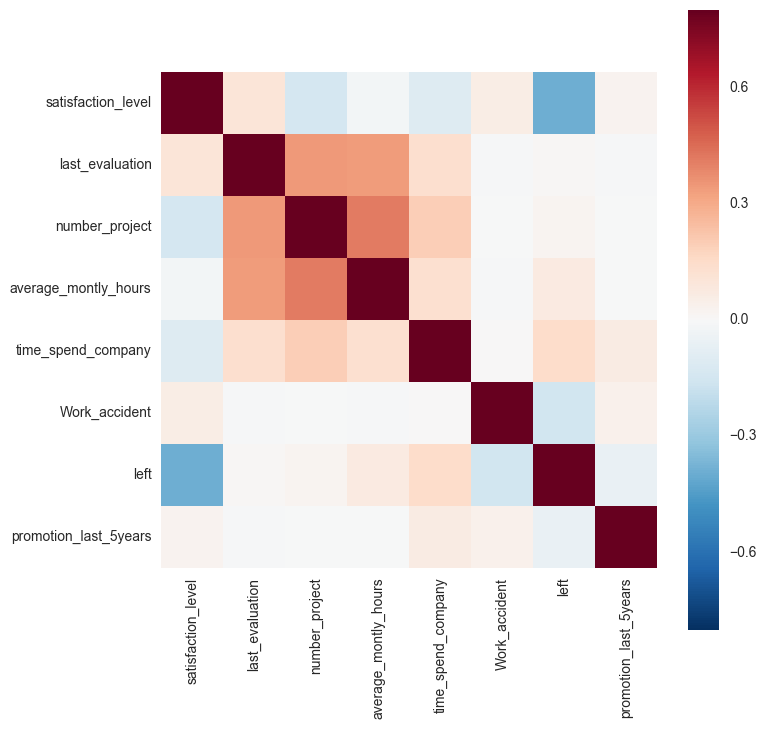

In [8]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

### As expected:

* 1, the more satisfcation, the higer score of evaluation, and the less being left
* 2, the more projects in hands, the more monthly working hour, and result in a higher score of last time evaluation(?) but being less satisfied. And spending more time in company, btw.
* 3, being promoted(aka. level up) more poeple happier, doing more job and being less likely to run away

### Jobs by salaries plot

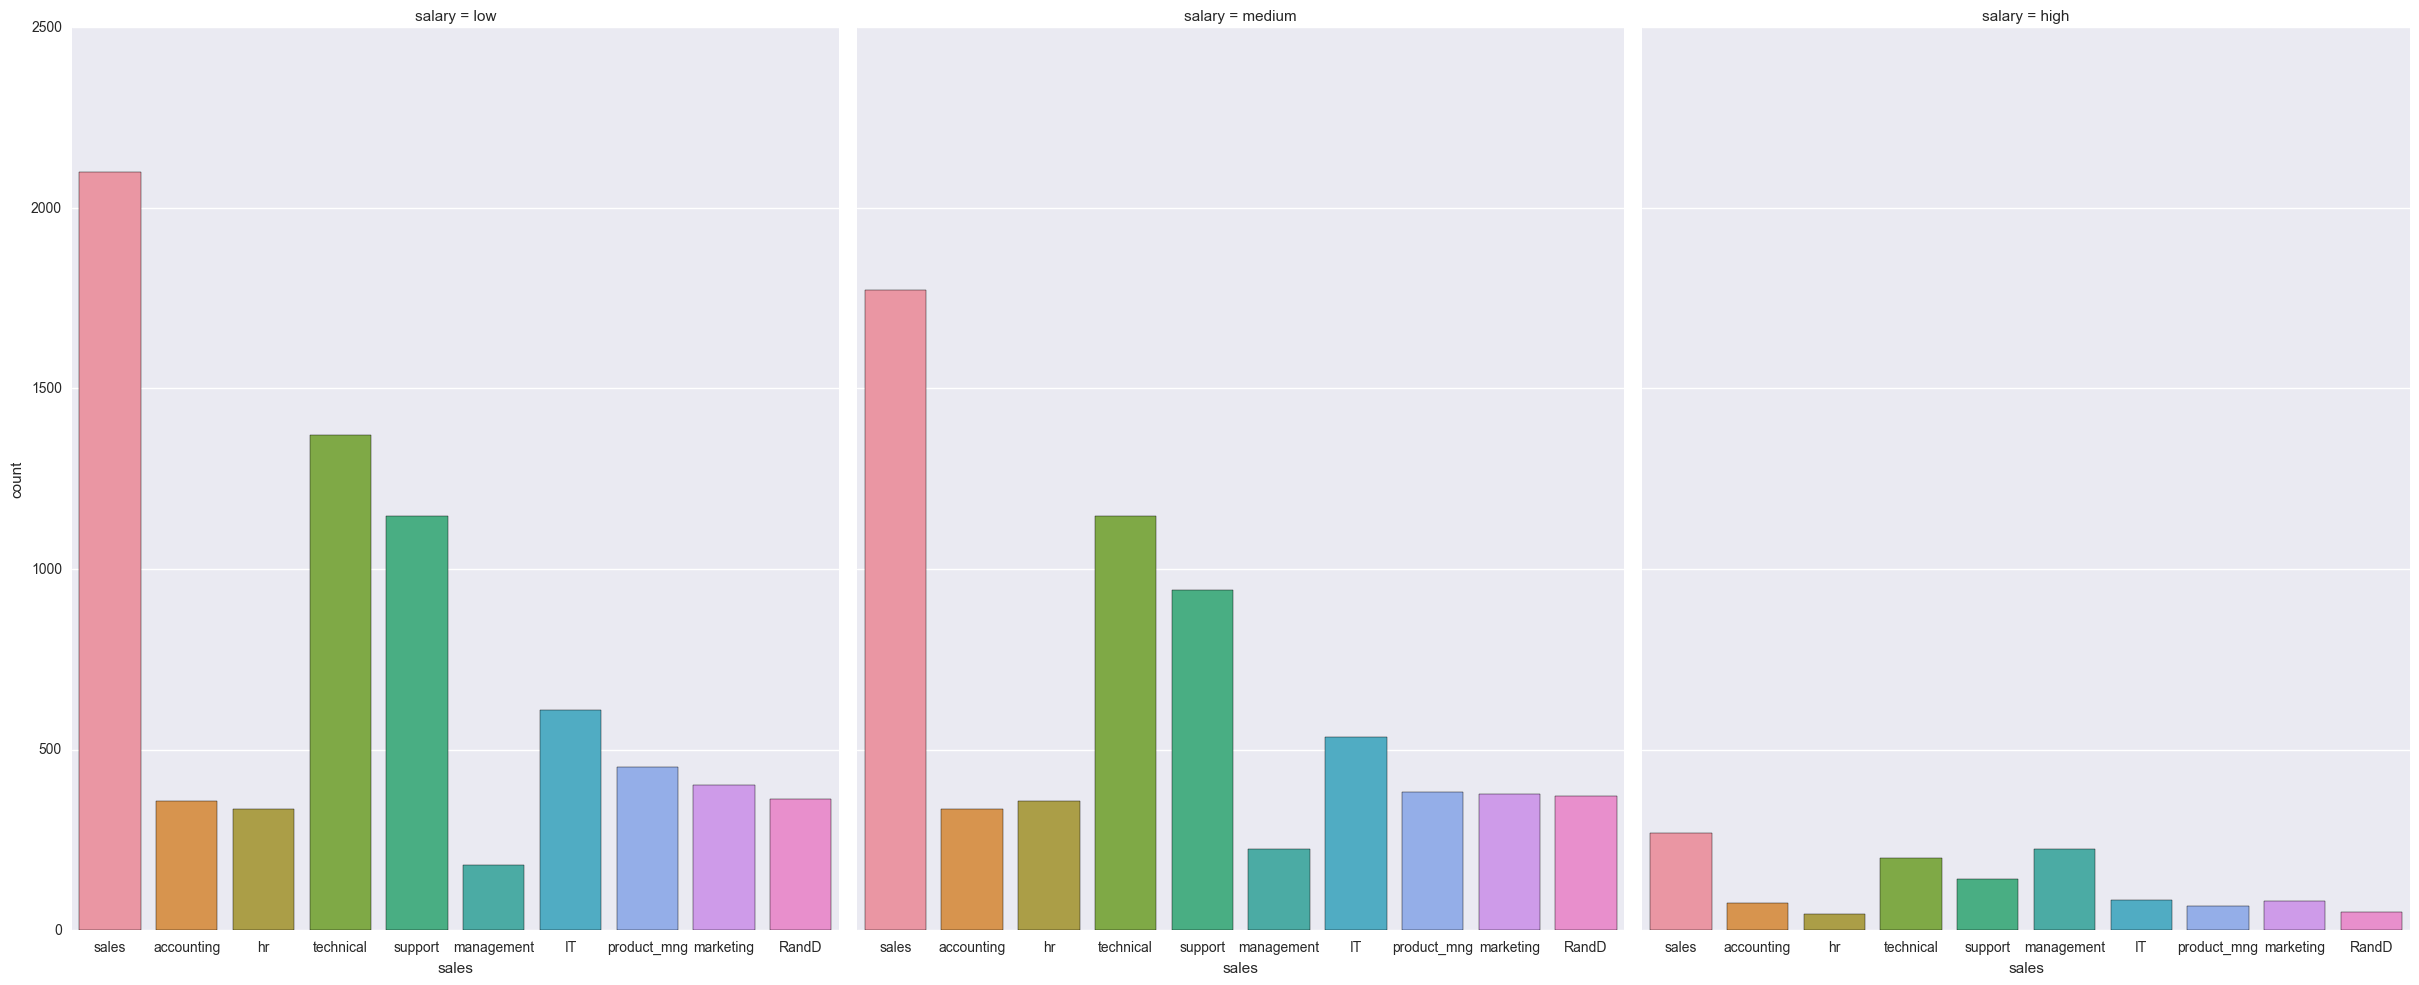

In [9]:
sns.factorplot("sales", col="salary", col_wrap=4, data=df, kind="count", size=10, aspect=.8)

## Number of people by salary

In [23]:
print(df[df['salary'] == 'low'].size)
print(df[df['salary'] == 'medium'].size)
print(df[df['salary'] == 'high'].size)

73160
64460
12370


## Satisfaction by sales(aka. jobs) and by salary

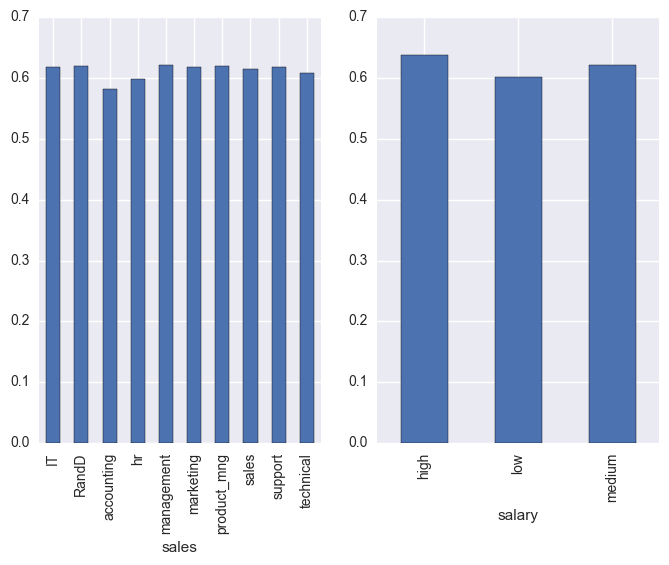

In [22]:
plt.subplot(1,2,1)
df.groupby('sales').mean()['satisfaction_level'].plot(kind='bar')
plt.subplot(1,2,2)
df.groupby('salary').mean()['satisfaction_level'].plot(kind='bar')

### Predict 'left == 1' by the other features